In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.metrics import (mean_squared_error,
                             r2_score, mean_absolute_error,
                             mean_absolute_percentage_error)
import math

In [50]:



def plot_ref_pred_scatter(path, id):
    df_ref = pd.read_csv(path + '/ref_' + str(id) + '.csv', index_col=0)
    df_pred = pd.read_csv(path + '/pred_' + str(id) + '.csv', index_col=0)
        
    #create graph with 8 subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Prediction vs Reference for each week of the id {id}')
    for i in range(2):
        for j in range(4):
            col = i * 4 + j
            axs[i, j].scatter(df_ref[str(col)], df_pred[str(col)])
            
            axs[i, j].set_xlabel('Reference')
            axs[i, j].set_ylabel('Prediction')
            axs[i, j].set_title(f'Week {col + 1}')
            
    plt.show()
    #for col in df_ref.columns:
      #  plt.scatter(df_ref[col], df_pred[col])
       # plt.xlabel('Reference')
       # plt.ylabel('Prediction')
      #  plt.title(f'Week {int(col) + 1}')
       # plt.show()
    
def plot_ref_pred_scatter_by_group(path, group_id):
    result_df = pd.read_csv(path + '/result.csv')
    model_ids = result_df[result_df['experiment_group'] == group_id]['model_id'].values.tolist()
    num_cols = len(pd.read_csv(path + '/pred_ref/ref_' + str(model_ids[0]) + '.csv', index_col=0).columns)
    
    
    #create graph with 8 subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Prediction vs Reference for each week for group {group_id} models {model_ids}')
    
    chart_cols = min(num_cols, 4)
    
    for i in range(math.ceil(num_cols/4)):
        for j in range(chart_cols):
            col = i * 4 + j
            
            if col < num_cols:
                for id in model_ids:
                    df_ref = pd.read_csv(path + '/pred_ref/ref_' + str(id) + '.csv', index_col=0)
                    df_pred = pd.read_csv(path + '/pred_ref/pred_' + str(id) + '.csv', index_col=0)
                    axs[i, j].scatter(df_ref[str(col)], df_pred[str(col)])
            
                axs[i, j].set_xlabel('Reference')
                axs[i, j].set_ylabel('Prediction')
                axs[i, j].set_title(f'Week {col + 1}')
            
    plt.show()
    #for col in df_ref.columns:
      #  plt.scatter(df_ref[col], df_pred[col])
       # plt.xlabel('Reference')
       # plt.ylabel('Prediction')
      #  plt.title(f'Week {int(col) + 1}')
       # plt.show()


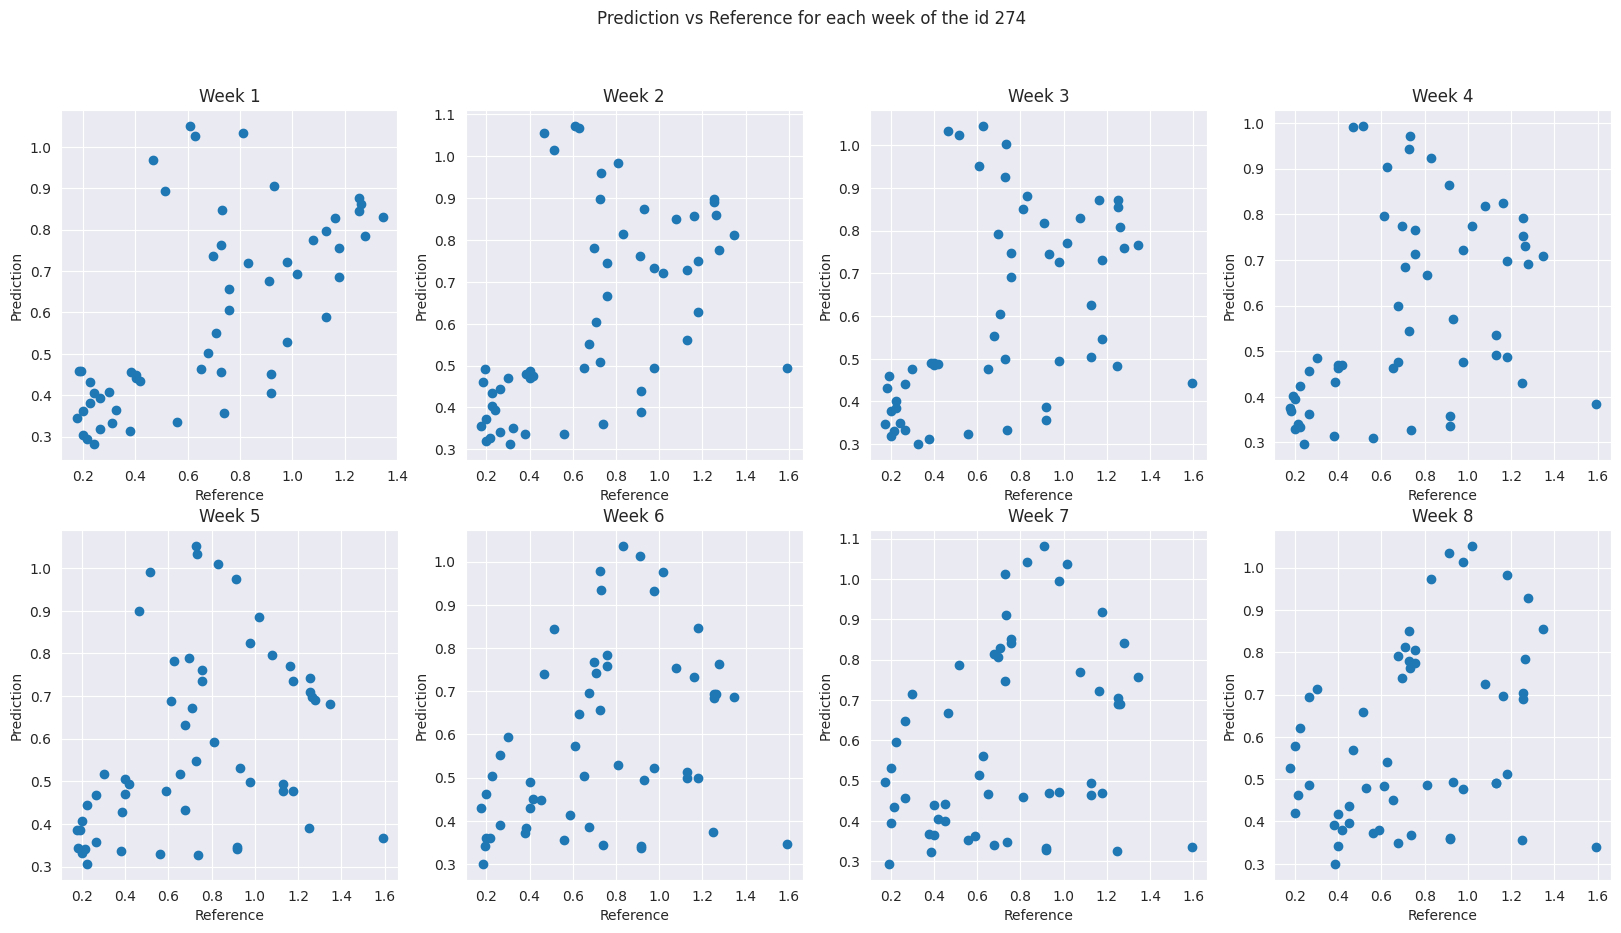

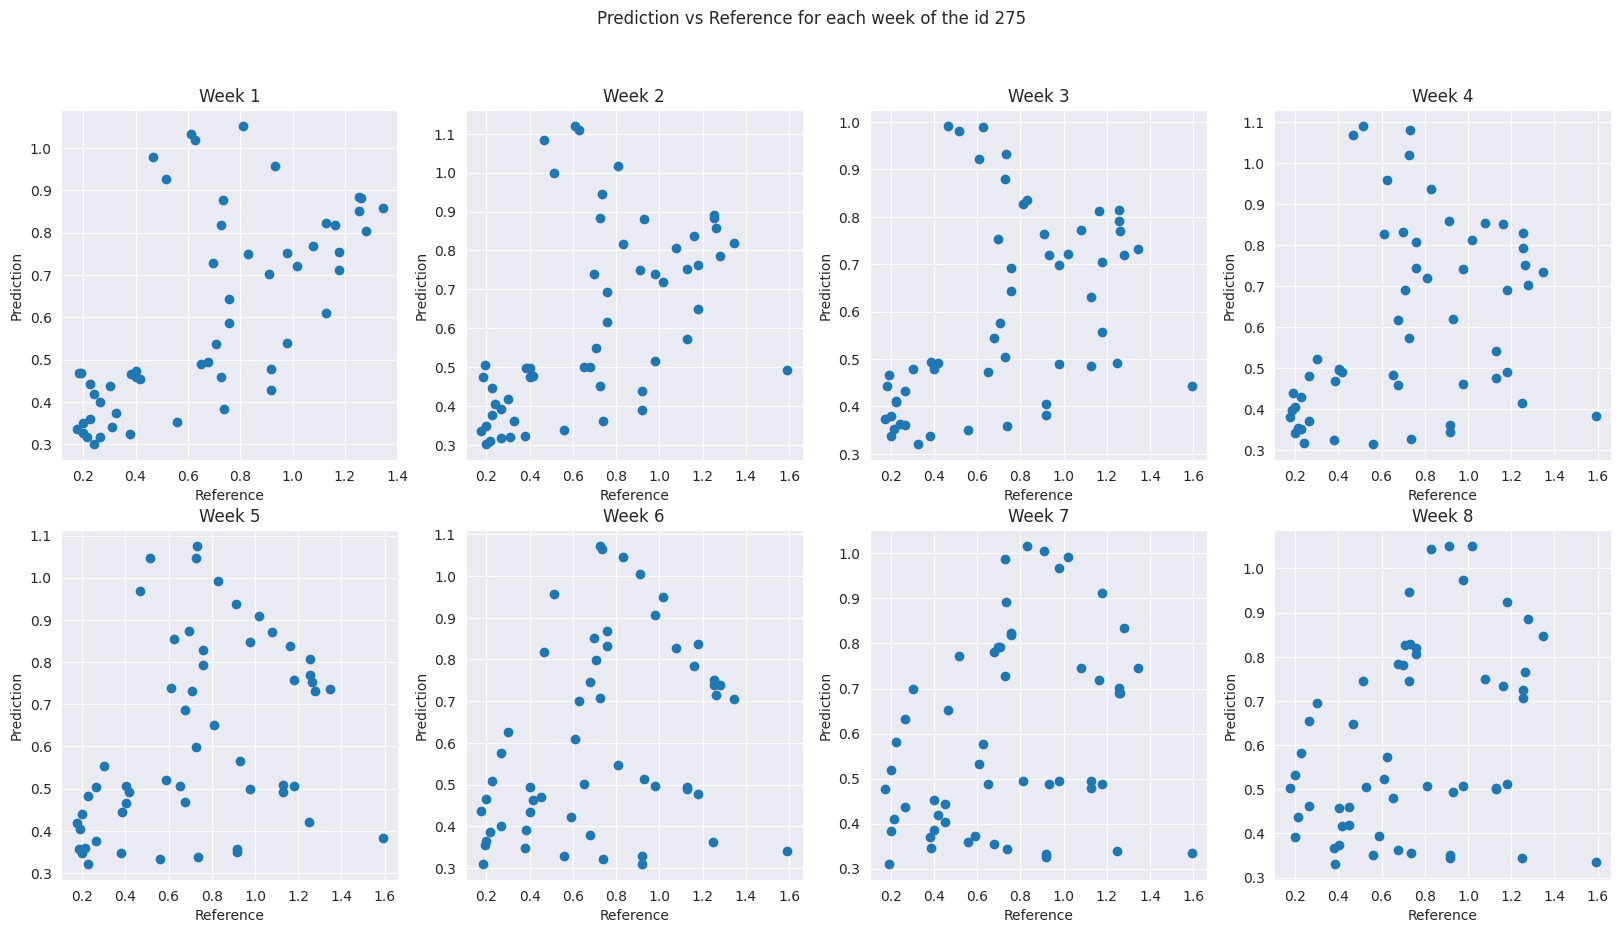

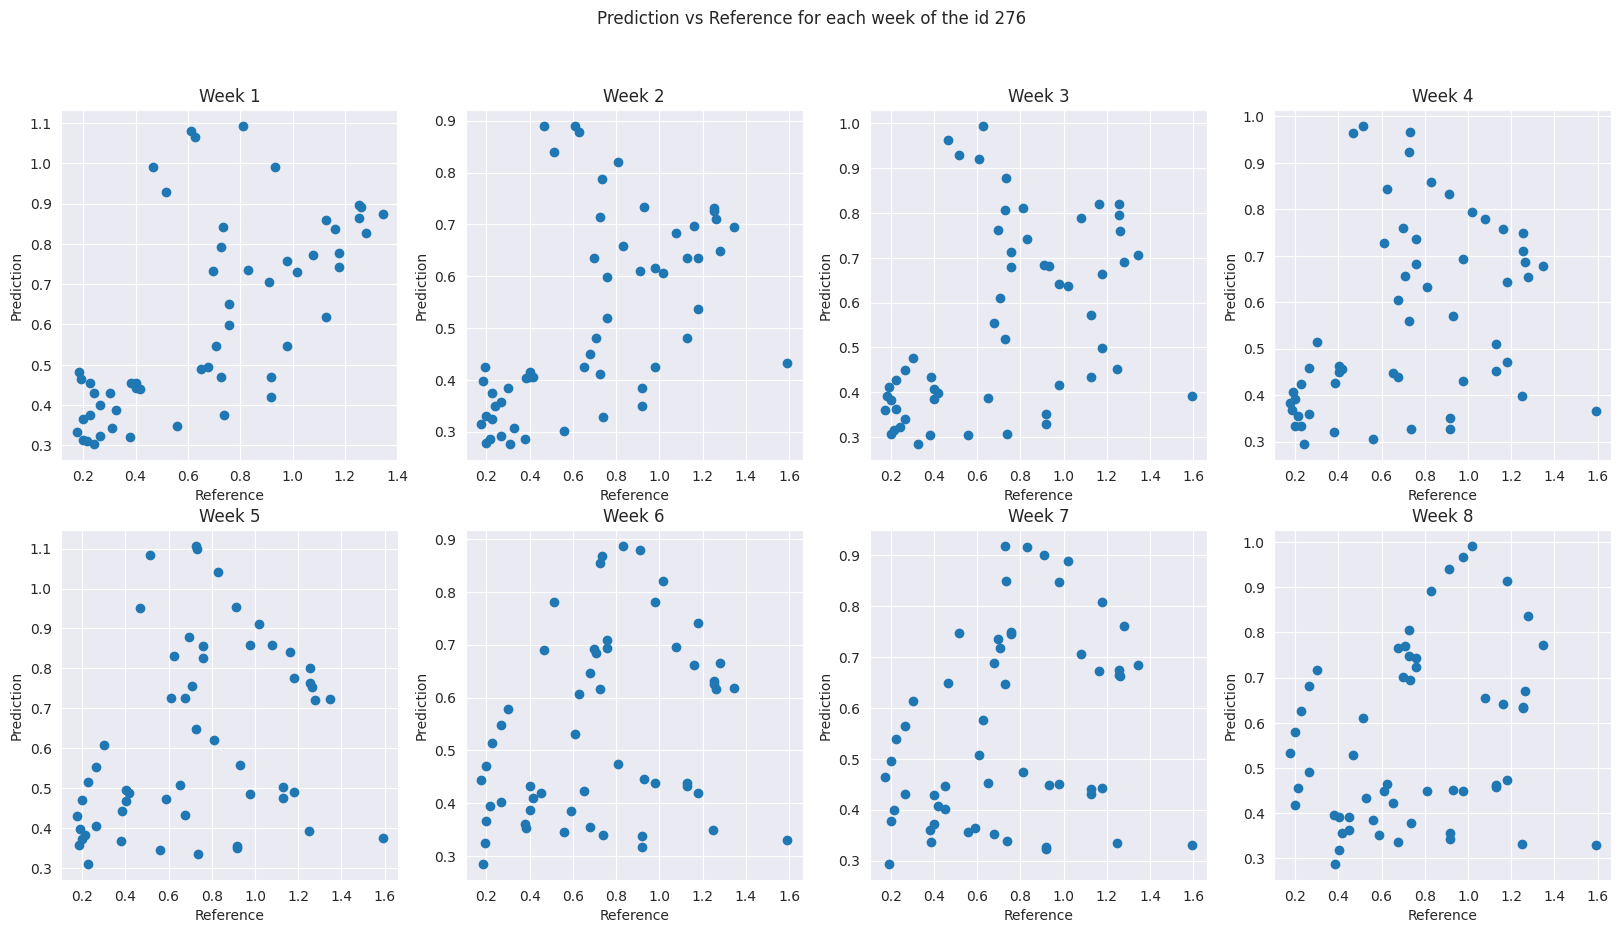

In [51]:
plot_ref_pred_scatter('../experiments/exp_test_2024-05-14/pred_ref', 274)
plot_ref_pred_scatter('../experiments/exp_test_2024-05-14/pred_ref', 275)
plot_ref_pred_scatter('../experiments/exp_test_2024-05-14/pred_ref', 276)


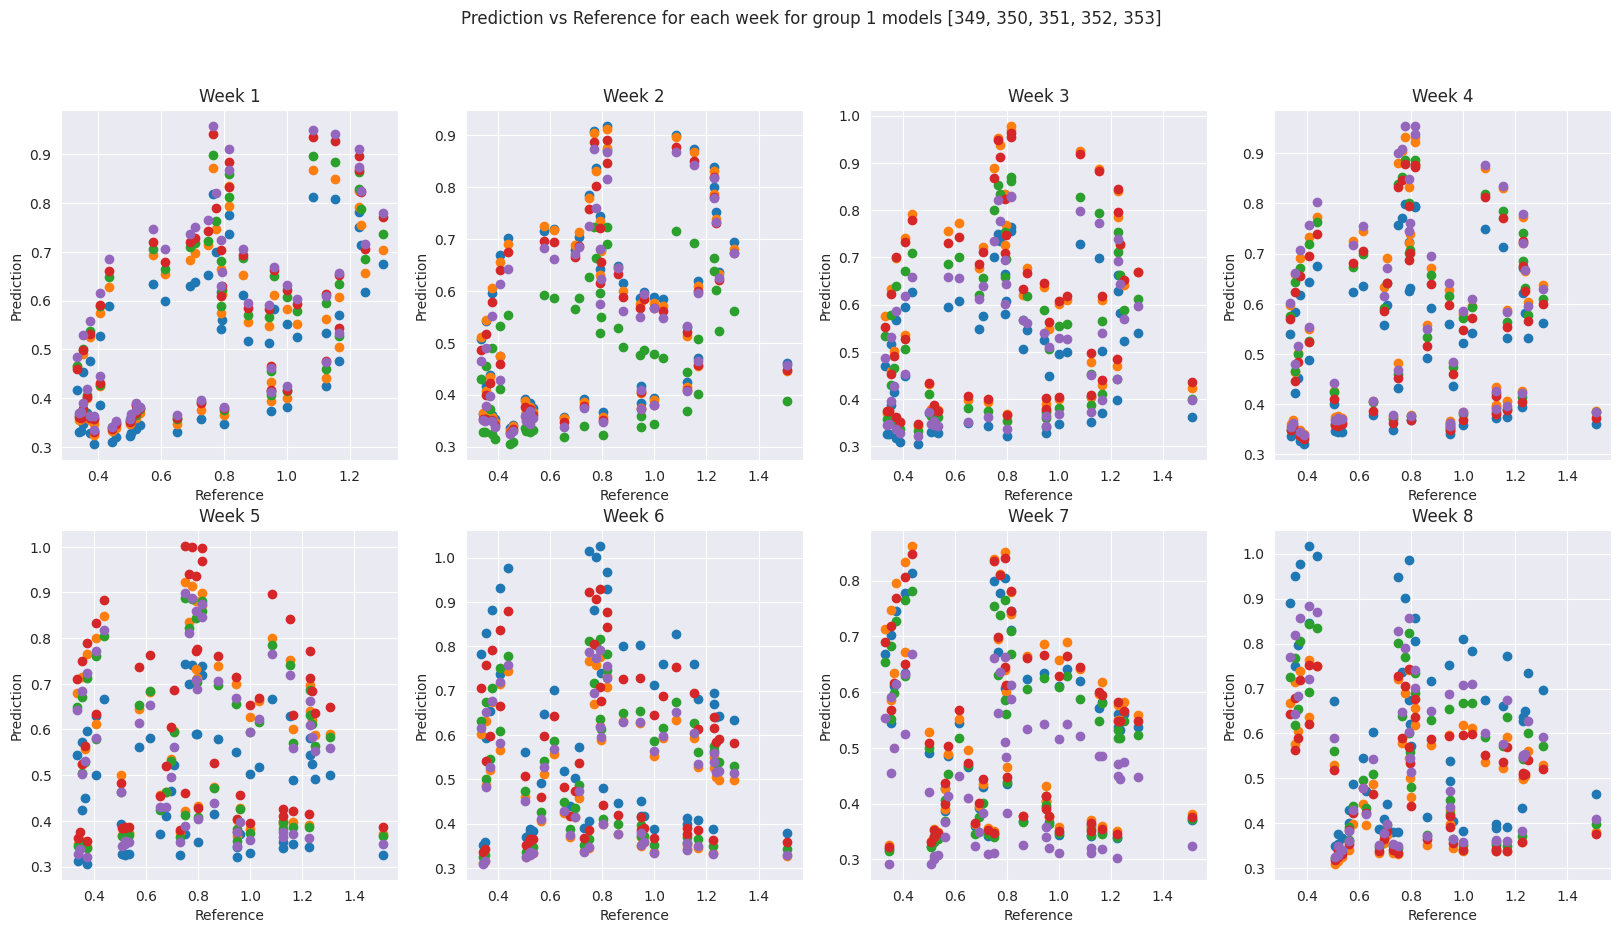

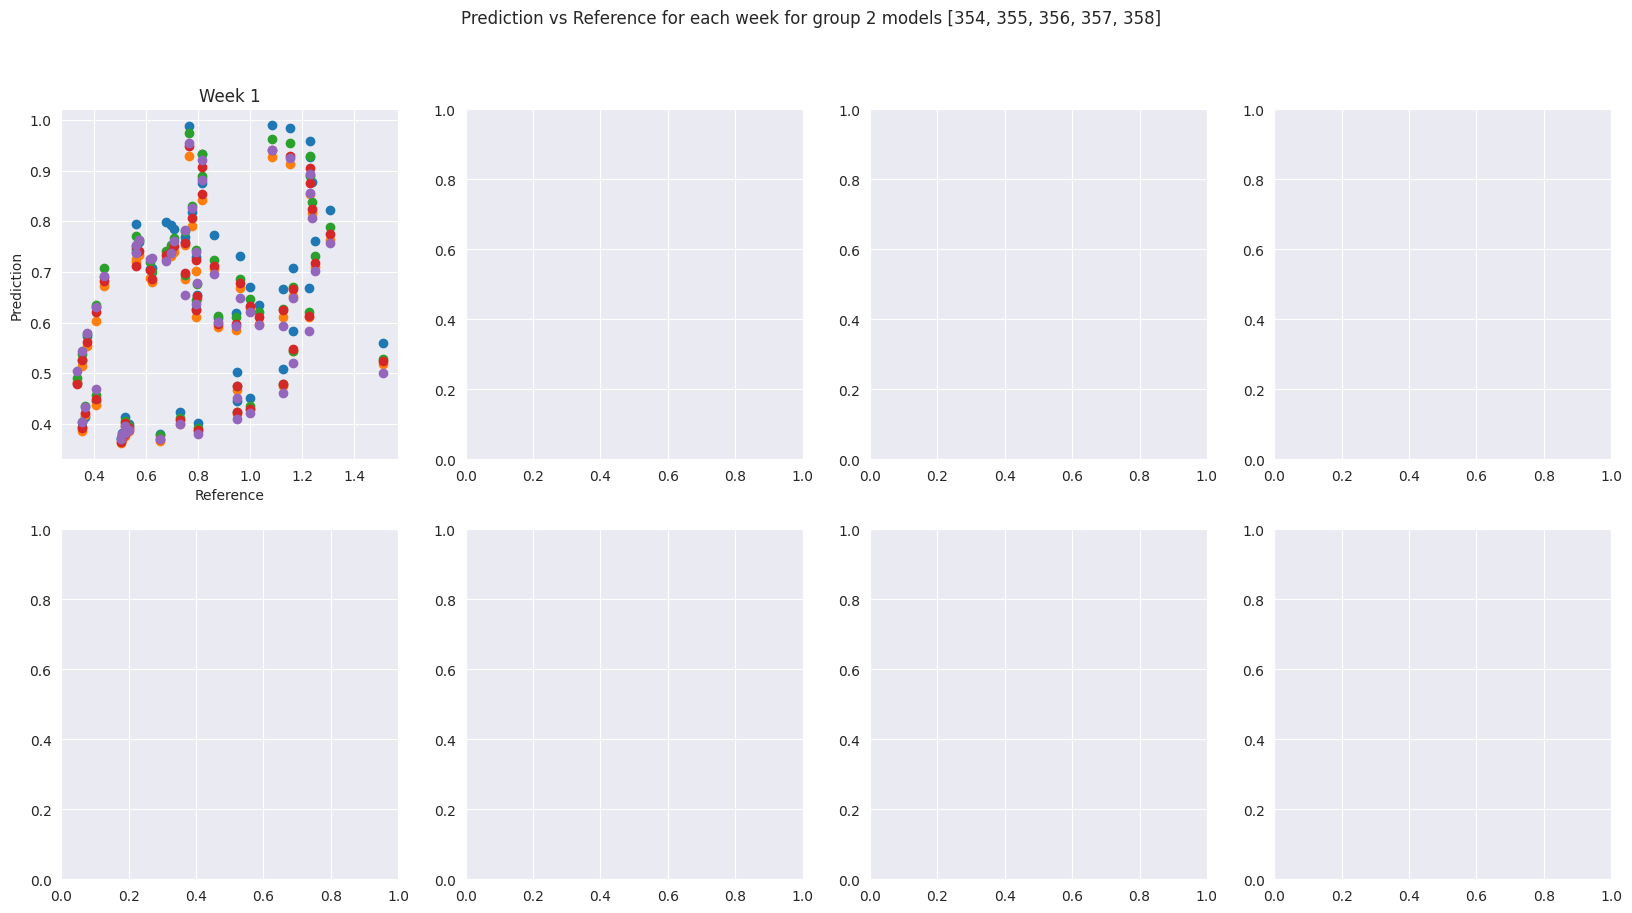

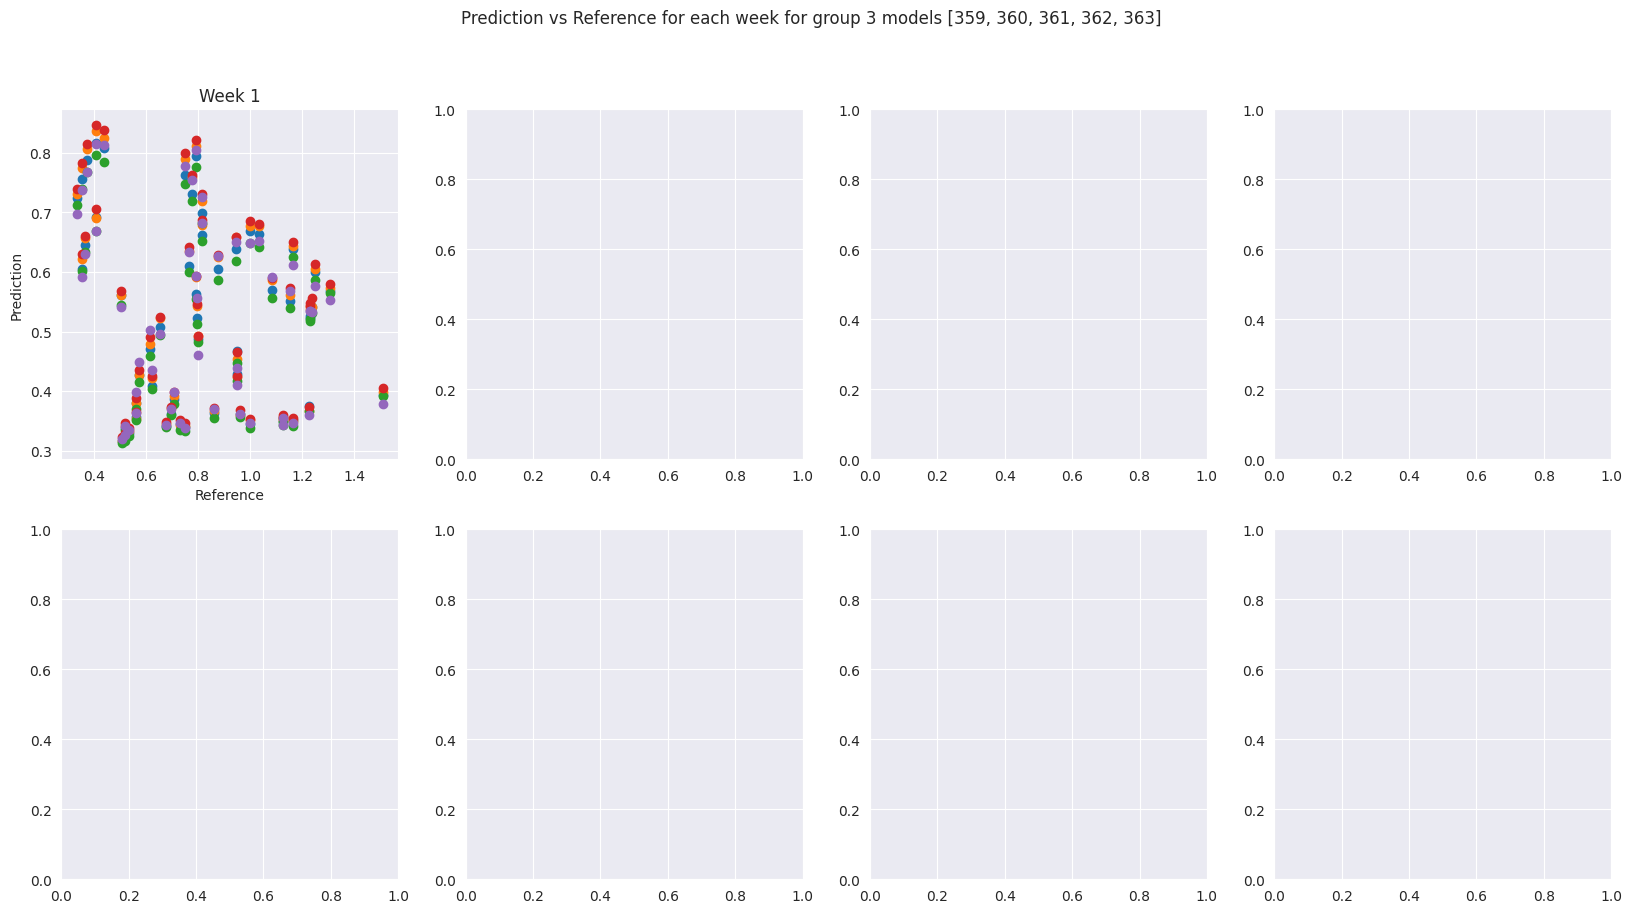

In [52]:
plot_ref_pred_scatter_by_group('../experiments/exp7_2024-05-27', 1)
plot_ref_pred_scatter_by_group('../experiments/exp7_2024-05-27', 2)
plot_ref_pred_scatter_by_group('../experiments/exp7_2024-05-27', 3)

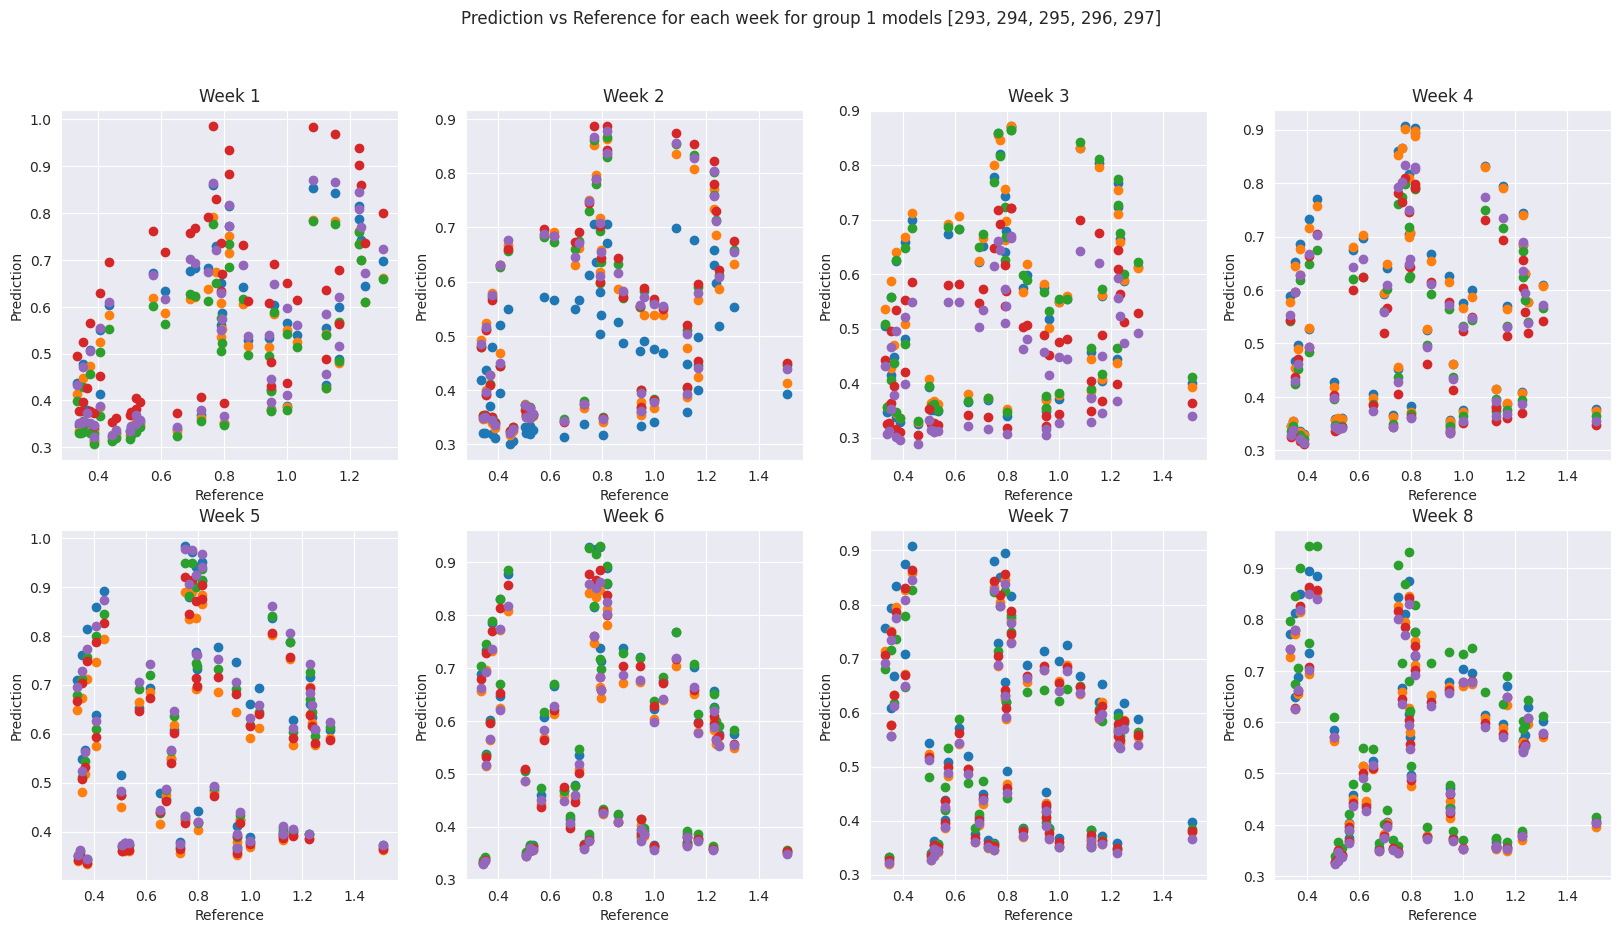

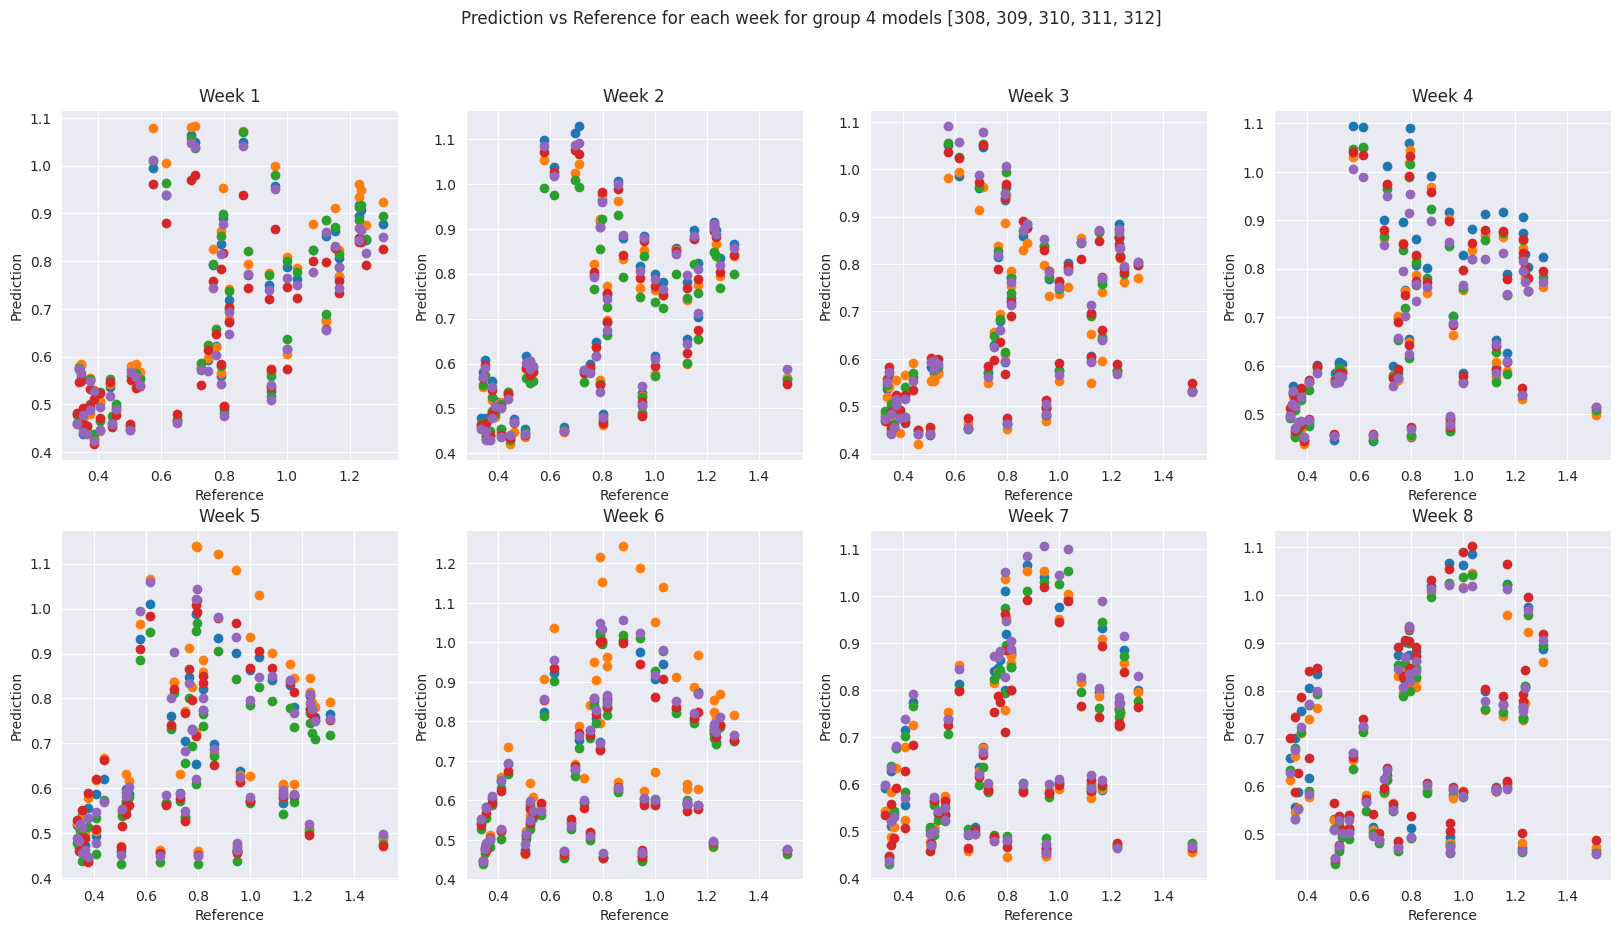

In [53]:
plot_ref_pred_scatter_by_group('../experiments/exp6_2024-05-05_rep', 1)
plot_ref_pred_scatter_by_group('../experiments/exp6_2024-05-05_rep', 4)